In [1]:
import numpy as np
import pandas as pd

In [8]:
data=pd.read_csv("Mall_c.csv")
df=pd.DataFrame(data)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]


In [14]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

C:\Users\hp\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
print(f'Inertia: {kmeans.inertia_}')

Inertia: 65.5684081557168


In [30]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5546571631111091


In [31]:
import matplotlib.pyplot as plt


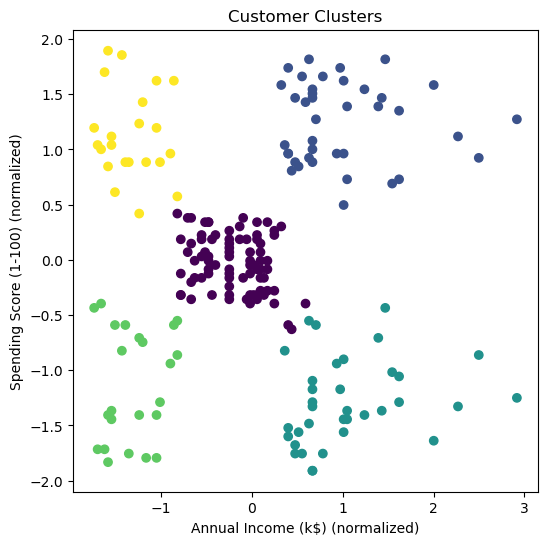

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$) (normalized)')
plt.ylabel('Spending Score (1-100) (normalized)')
plt.show()